In [1]:
import os
from os import path

import json

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
meta_dict = {}

for folder in os.listdir():
    if path.isdir(folder) and folder not in ['.ipynb_checkpoints', 'all_features']:
        for file in os.listdir(path.join(folder, 'original_files')):
            if file.rsplit(".")[-1] == 'json':
                with open(path.join(folder, 'original_files', file)) as json_file:
                    meta_dict[file.rsplit(".")[0]] = (json.load(json_file))
               

In [3]:
df = pd.read_pickle('dataframe_dropped.pkl')

In [4]:
df.sample(1)

,convex_area,euler_number,extent,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-2,inertia_tensor-2-2,local_centroid-0,max_intensity-0,max_intensity-1,...,hc_foci_d_nearest_neighbor_mean,hc_foci_d_nearest_neighbor_variance,hc_foci_ratio_nearest_neighbor_volume_mean,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,full_label,condition
1474,75221.0,1.0,0.502136,-9.976264,-5.732187,42.375929,354.584765,6.805687,255.0,255.0,...,1.709757,0.710763,17.076605,117.64317,1.059579,0.58401,0.070639,0.038934,JC_Plate1_TNFa_low_25_nucleus_1,TNFa_low


In [5]:
def add_meta_data(row):
    filename = '_'.join(row.full_label.rsplit('_')[:-2])
    spy, spx = meta_dict[filename]['StagePosY'], meta_dict[filename]['StagePosX']
    row['StagePosX'] = np.float64(spx)
    row['StagePosY'] = np.float64(spy)
    return(row)


In [6]:
df = df.apply(add_meta_data, axis=1)

In [7]:
df.StagePosX

0       0.073996
1       0.073996
2       0.072552
3       0.072552
4       0.072552
          ...   
2133    0.049677
2134    0.048445
2135    0.048445
2136    0.048445
2137    0.049247
Name: StagePosX, Length: 2138, dtype: float64

In [8]:
df.sample(1)

,convex_area,euler_number,extent,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-2,inertia_tensor-2-2,local_centroid-0,max_intensity-0,max_intensity-1,...,hc_foci_ratio_nearest_neighbor_volume_mean,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,full_label,condition,StagePosX,StagePosY
198,63270.0,1.0,0.481573,-4.293239,13.447913,-16.775426,501.137476,5.638609,255.0,255.0,...,14.545978,62.076702,0.69482,0.242313,0.043426,0.015145,JC_Plate1_MCP_low_51_nucleus_1,MCP_low,0.073416,0.016502


In [9]:
df.groupby('condition').describe()

convex_area                                                          \
                count          mean           std      min       25%      50%   
condition                                                                       
BSA_good        283.0  94765.547703  24097.982943  44879.0  78031.00  90287.0   
Control         260.0  87473.419231  23168.313343  40283.0  72111.25  84565.0   
MCP_low         259.0  86376.247104  24938.475116  38226.0  67852.00  79707.0   
TNFa_low        190.0  91200.252632  25768.081031  41149.0  72526.50  86932.5   
both_high       261.0  92367.727969  25863.901875  42149.0  73814.00  85166.0   
both_low        263.0  96371.874525  25787.937414  46112.0  76088.00  92631.0   
mcp_high        314.0  90795.133758  24243.494463  44686.0  72543.25  86598.5   
tnfa_high       308.0  89094.886364  22722.971154  48481.0  72200.50  85779.5   

                               euler_number            ... StagePosX  \
                 75%       max        count      mean  ...       75%   
condition                                              ...             
BSA_good   110660.00  151629.0        283.0  0.501767  ...  0.025856   
Control    100848.75  153333.0        260.0  0.596154  ...  0.030900   
MCP_low    104550.50  149043.0        259.0  0.799228  ...  0.074395   
TNFa_low   111289.25  149401.0        190.0  0.642105  ...  0.051009   
both_high  111142.00  152455.0        261.0  0.727969  ...  0.103941   
both_low   118290.50  151831.0        263.0  0.730038  ...  0.100326   
mcp_high   108079.25  162762.0        314.0  0.812102  ...  0.076215   
tnfa_high  106878.25  148928.0        308.0  0.860390  ...  0.050363   

                    StagePosY                                          \
                max     count      mean       std       min       25%   
condition                                                               
BSA_good   0.027680     283.0  0.015691  0.001325  0.013714  0.014489   
Control    0.031915     260.0  0.035737  0.001185  0.034286  0.034529   
MCP_low    0.075110     259.0  0.016828  0.000956  0.015140  0.015811   
TNFa_low   0.051874     190.0  0.014733  0.000910  0.013230  0.014064   
both_high  0.104636     261.0  0.037969  0.001173  0.036209  0.037033   
both_low   0.100942     263.0  0.013119  0.000852  0.011645  0.012383   
mcp_high   0.077272     314.0  0.039161  0.000914  0.037057  0.038529   
tnfa_high  0.051736     308.0  0.040790  0.001070  0.038855  0.039859   

                                         
                50%       75%       max  
condition                                
BSA_good   0.015640  0.016843  0.017884  
Control    0.035535  0.036866  0.037890  
MCP_low    0.017022  0.017630  0.018356  
TNFa_low   0.014578  0.015481  0.016908  
both_high  0.037948  0.038803  0.040271  
both_low   0.013137  0.013794  0.014776  
mcp_high   0.039232  0.039872  0.040577  
tnfa_high  0.040791  0.041652  0.042865  

[8 rows x 1384 columns]

In [10]:
def assign_bins(group):
    x_bins = pd.qcut(group['StagePosX'], q=3, labels=[1, 2, 3])
    y_bins = pd.qcut(group['StagePosY'], q=3, labels=[1, 2, 3])
    group['position'] = (x_bins.astype(str) + '-' + y_bins.astype(str)).astype(str)
    return group

df = df.groupby('condition').apply(assign_bins).reset_index(drop=True)

df.sample(10)

/tmp/ipykernel_1154323/3768397341.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  group['position'] = (x_bins.astype(str) + '-' + y_bins.astype(str)).astype(str)
/tmp/ipykernel_1154323/3768397341.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  group['position'] = (x_bins.astype(str) + '-' + y_bins.astype(str)).astype(str)
/tmp/ipykernel_1154323/3768397341.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

,convex_area,euler_number,extent,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-2,inertia_tensor-2-2,local_centroid-0,max_intensity-0,max_intensity-1,...,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,full_label,condition,StagePosX,StagePosY,position
1095,64637.0,1.0,0.421497,6.451790,-1.154801,-103.940162,482.755792,5.861224,255.0,255.0,...,14.913970,0.714115,0.433287,0.031048,0.018839,JC_Plate1_both_high_18_nucleus_4,both_high,0.102634,0.036560,1-1
831,77833.0,1.0,0.440944,-0.826574,15.821959,40.564076,463.832989,6.347015,255.0,255.0,...,3222.729471,1.193267,1.536955,0.149158,0.192119,JC_Plate1_TNFa_low_89_nucleus_5,TNFa_low,0.048716,0.015698,1-3
128,80866.0,1.0,0.410041,11.221896,20.572261,-63.817228,503.278933,7.366329,255.0,255.0,...,593.533157,1.146994,0.788375,0.104272,0.071670,JC_Plate1_BSA_good_28_nucleus_5,BSA_good,0.025061,0.014476,2-1
1585,63758.0,1.0,0.498275,15.275435,9.072970,-14.332864,360.259337,6.313634,255.0,255.0,...,4504.966684,0.836494,0.202766,0.139416,0.033794,JC_Plate1_mcp_high_70_nucleus_1,mcp_high,0.075031,0.039267,2-2
133,104388.0,1.0,0.452617,-0.528858,-9.774908,-89.195548,847.642036,7.503991,255.0,255.0,...,7.046220,0.467485,0.220278,0.011402,0.005373,JC_Plate1_BSA_good_94_nucleus_2,BSA_good,0.026291,0.016615,3-3
153,80669.0,1.0,0.469306,4.218995,-2.688348,-32.893297,474.532538,7.490831,255.0,255.0,...,26.396522,0.729034,0.468501,0.028040,0.018019,JC_Plate1_BSA_good_112_nucleus_2,BSA_good,0.024316,0.017506,1-3
1560,64396.0,1.0,0.424982,10.988188,3.876754,117.404171,449.261158,6.848182,255.0,255.0,...,666.911957,0.871213,0.579820,0.072601,0.048318,JC_Plate1_mcp_high_31_nucleus_1,mcp_high,0.075511,0.038437,2-1
1271,58844.0,1.0,0.452020,6.939396,-9.645891,56.531626,430.896244,5.543291,255.0,255.0,...,17.100100,0.386807,0.097535,0.014326,0.003612,JC_Plate1_both_low_120_nucleus_2,both_low,0.100451,0.014549,3-3
161,83969.0,1.0,0.461893,-11.370143,13.661819,-17.715697,532.902478,5.791485,255.0,255.0,...,85.325061,0.788735,0.515319,0.043819,0.028629,JC_Plate1_BSA_good_30_nucleus_1,BSA_good,0.024537,0.014489,1-1
266,63065.0,1.0,0.485210,-6.803730,2.382637,39.432581,533.919472,5.390610,255.0,255.0,...,241.675571,1.132298,0.628901,0.102936,0.057173,JC_Plate1_BSA_good_46_nucleus_1,BSA_good,0.025347,0.014820,2-2


In [11]:
grouped = df.groupby('condition')

grouped.describe()

convex_area                                                          \
                count          mean           std      min       25%      50%   
condition                                                                       
BSA_good        283.0  94765.547703  24097.982943  44879.0  78031.00  90287.0   
Control         260.0  87473.419231  23168.313343  40283.0  72111.25  84565.0   
MCP_low         259.0  86376.247104  24938.475116  38226.0  67852.00  79707.0   
TNFa_low        190.0  91200.252632  25768.081031  41149.0  72526.50  86932.5   
both_high       261.0  92367.727969  25863.901875  42149.0  73814.00  85166.0   
both_low        263.0  96371.874525  25787.937414  46112.0  76088.00  92631.0   
mcp_high        314.0  90795.133758  24243.494463  44686.0  72543.25  86598.5   
tnfa_high       308.0  89094.886364  22722.971154  48481.0  72200.50  85779.5   

                               euler_number            ... StagePosX  \
                 75%       max        count      mean  ...       75%   
condition                                              ...             
BSA_good   110660.00  151629.0        283.0  0.501767  ...  0.025856   
Control    100848.75  153333.0        260.0  0.596154  ...  0.030900   
MCP_low    104550.50  149043.0        259.0  0.799228  ...  0.074395   
TNFa_low   111289.25  149401.0        190.0  0.642105  ...  0.051009   
both_high  111142.00  152455.0        261.0  0.727969  ...  0.103941   
both_low   118290.50  151831.0        263.0  0.730038  ...  0.100326   
mcp_high   108079.25  162762.0        314.0  0.812102  ...  0.076215   
tnfa_high  106878.25  148928.0        308.0  0.860390  ...  0.050363   

                    StagePosY                                          \
                max     count      mean       std       min       25%   
condition                                                               
BSA_good   0.027680     283.0  0.015691  0.001325  0.013714  0.014489   
Control    0.031915     260.0  0.035737  0.001185  0.034286  0.034529   
MCP_low    0.075110     259.0  0.016828  0.000956  0.015140  0.015811   
TNFa_low   0.051874     190.0  0.014733  0.000910  0.013230  0.014064   
both_high  0.104636     261.0  0.037969  0.001173  0.036209  0.037033   
both_low   0.100942     263.0  0.013119  0.000852  0.011645  0.012383   
mcp_high   0.077272     314.0  0.039161  0.000914  0.037057  0.038529   
tnfa_high  0.051736     308.0  0.040790  0.001070  0.038855  0.039859   

                                         
                50%       75%       max  
condition                                
BSA_good   0.015640  0.016843  0.017884  
Control    0.035535  0.036866  0.037890  
MCP_low    0.017022  0.017630  0.018356  
TNFa_low   0.014578  0.015481  0.016908  
both_high  0.037948  0.038803  0.040271  
both_low   0.013137  0.013794  0.014776  
mcp_high   0.039232  0.039872  0.040577  
tnfa_high  0.040791  0.041652  0.042865  

[8 rows x 1384 columns]

In [12]:
first_group_key = list(grouped.groups.keys())[0]
first_group = grouped.get_group(first_group_key)

first_group.sample(10)

,convex_area,euler_number,extent,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-2,inertia_tensor-2-2,local_centroid-0,max_intensity-0,max_intensity-1,...,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,full_label,condition,StagePosX,StagePosY,position
94,109391.0,1.0,0.509732,-0.792166,13.266575,99.445719,658.404374,7.442461,255.0,255.0,...,272.737877,0.816479,0.535088,0.042973,0.028163,JC_Plate1_BSA_good_97_nucleus_2,BSA_good,0.024851,0.016843,2-3
202,87808.0,1.0,0.467439,4.305841,-10.632982,33.103400,616.800242,6.352490,255.0,255.0,...,2.859992,0.494835,0.286421,0.010996,0.006365,JC_Plate1_BSA_good_19_nucleus_1,BSA_good,0.024052,0.014259,1-1
78,89147.0,1.0,0.506589,-8.431911,-2.421943,-41.766229,406.138840,6.721949,255.0,255.0,...,789.661848,1.089889,0.984707,0.090824,0.082059,JC_Plate1_BSA_good_60_nucleus_3,BSA_good,0.026202,0.015192,3-2
135,91813.0,1.0,0.504153,-0.847690,1.349785,-29.993879,465.023764,7.669931,255.0,255.0,...,30.487829,0.681551,0.479534,0.024341,0.017126,JC_Plate1_BSA_good_76_nucleus_2,BSA_good,0.027320,0.016016,3-2
166,73566.0,1.0,0.437580,-14.627644,-3.810278,-18.242236,482.743607,7.426862,255.0,255.0,...,48.599343,0.664646,0.359089,0.030211,0.016322,JC_Plate1_BSA_good_4_nucleus_4,BSA_good,0.024924,0.013826,2-1
213,89116.0,1.0,0.476439,-22.468946,-4.822427,-1.528036,498.808986,7.508780,255.0,255.0,...,179.027521,0.518666,0.315190,0.030510,0.018541,JC_Plate1_BSA_good_111_nucleus_1,BSA_good,0.025011,0.017487,2-3
38,75090.0,1.0,0.518409,-6.999510,-1.686885,59.024258,455.032777,6.856564,255.0,255.0,...,208.013436,1.120057,0.289591,0.080004,0.020685,JC_Plate1_BSA_good_55_nucleus_2,BSA_good,0.024506,0.015116,1-2
160,78341.0,1.0,0.479885,-4.813059,-2.340697,109.608639,509.100203,5.343369,255.0,255.0,...,407.837690,0.667014,0.444549,0.044468,0.029637,JC_Plate1_BSA_good_14_nucleus_4,BSA_good,0.025481,0.014089,2-1
147,76903.0,1.0,0.498116,-5.110652,-16.507450,-46.485818,538.597764,6.412714,255.0,255.0,...,85.201471,0.609603,0.459905,0.026504,0.019996,JC_Plate1_BSA_good_25_nucleus_1,BSA_good,0.024286,0.014443,1-1
66,96504.0,-1.0,0.384321,16.856218,-10.792183,-25.568144,705.584458,8.569714,255.0,255.0,...,46.345331,0.670117,0.336684,0.030460,0.015304,JC_Plate1_BSA_good_37_nucleus_4,BSA_good,0.025536,0.014594,2-1


In [13]:
df.to_pickle('dataframe_position.pkl')

<h4> Cluster analysis </h4>

In [3]:
df = pd.read_pickle('dataframe_position.pkl')
df.sample(1)

,convex_area,euler_number,extent,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-2,inertia_tensor-2-2,local_centroid-0,max_intensity-0,max_intensity-1,...,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,full_label,condition,StagePosX,StagePosY,position
522,102084.0,1.0,0.517941,2.594269,-0.897205,-43.066092,524.104713,6.948277,255.0,255.0,...,468.023109,1.263838,0.588623,0.090274,0.042045,JC_Plate1_Control_81_nucleus_3,Control,0.030579,0.036831,2-3


In [15]:
from sklearn.preprocessing import StandardScaler

positions = df['position']
conditions = df['condition']

columns = [col for col in df.columns if ('full_label' not in col and 'condition' not in col and 'StagePosX' not in col and 'StagePosY' not in col and 'position' not in col)]

scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[columns]), columns=columns)

In [16]:
from sklearn.manifold import TSNE

# Create and fit t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_representation = tsne.fit_transform(df_normalized)

# Create DataFrame from t-SNE-transformed data
transformed_data = pd.DataFrame(tsne_representation, columns=['Component 1', 'Component 2'])


In [17]:
transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), conditions.reset_index(drop=True)], axis=1, ignore_index=False)
transformed_data_labeled

,Component 1,Component 2,condition
0,22.177780,26.487314,BSA_good
1,-1.166049,30.727753,BSA_good
2,-10.739321,-3.332122,BSA_good
3,7.815750,10.572560,BSA_good
4,12.548285,-23.514763,BSA_good
...,...,...,...
2133,12.087173,22.780703,tnfa_high
2134,-0.223655,-57.376736,tnfa_high
2135,-6.592481,-53.631920,tnfa_high
2136,6.580225,4.481876,tnfa_high


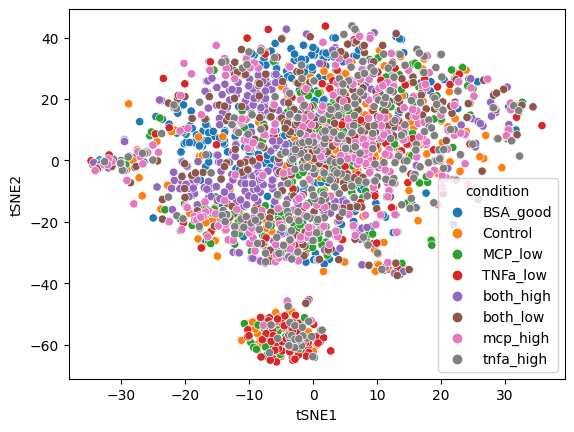

In [18]:
sns.scatterplot(data = transformed_data_labeled, x = 'Component 1', y = 'Component 2', hue='condition')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()

In [19]:
transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), positions.reset_index(drop=True)], axis=1, ignore_index=False)
transformed_data_labeled

,Component 1,Component 2,position
0,22.177780,26.487314,3-2
1,-1.166049,30.727753,3-2
2,-10.739321,-3.332122,3-3
3,7.815750,10.572560,3-3
4,12.548285,-23.514763,1-3
...,...,...,...
2133,12.087173,22.780703,2-2
2134,-0.223655,-57.376736,1-2
2135,-6.592481,-53.631920,1-2
2136,6.580225,4.481876,1-2


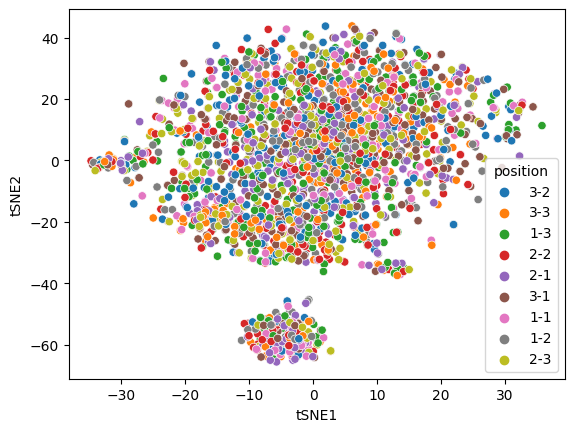

In [20]:
sns.scatterplot(data = transformed_data_labeled, x = 'Component 1', y = 'Component 2', hue='position')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()

<h5> only for control </h5>

In [21]:
bsa_good = df.groupby('condition').get_group('BSA_good')

In [22]:
positions = bsa_good['position']
conditions = bsa_good['condition']

columns = [col for col in bsa_good.columns if ('full_label' not in col and 'condition' not in col and 'StagePosX' not in col and 'StagePosY' not in col and 'position' not in col)]

scaler = StandardScaler()
bsa_good_normalized = pd.DataFrame(scaler.fit_transform(bsa_good[columns]), columns=columns)

In [23]:
tsne = TSNE(n_components=2, random_state=42)
tsne_representation = tsne.fit_transform(bsa_good_normalized)

transformed_data = pd.DataFrame(tsne_representation, columns=['Component 1', 'Component 2'])

In [24]:
transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), positions.reset_index(drop=True)], axis=1, ignore_index=False)
transformed_data_labeled

,Component 1,Component 2,position
0,3.210135,-3.296927,3-2
1,6.930984,-1.941702,3-2
2,-2.551791,0.078850,3-3
3,1.043167,-4.659869,3-3
4,-3.773278,7.730546,1-3
...,...,...,...
278,1.507504,3.914147,2-3
279,3.581769,-5.706296,2-3
280,1.720491,6.371539,2-2
281,2.098692,-2.104041,2-2


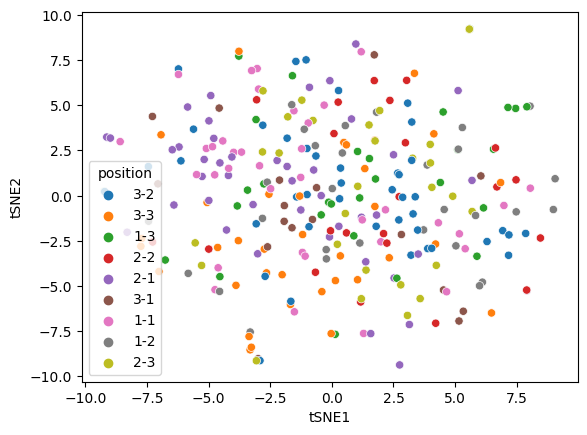

In [25]:
sns.scatterplot(data = transformed_data_labeled, x = 'Component 1', y = 'Component 2', hue='position')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()

In [4]:
def plot_cluster_check_for_condition(df):
    from sklearn.preprocessing import StandardScaler
    from sklearn.manifold import TSNE
    df = df.groupby('condition')
    dfs = {}
    for condition in df.groups.keys():
        df_condition = df.get_group(condition)
        
        positions = df_condition['position']
        conditions = df_condition['condition']
        full_labels = df_condition['full_label']
        
        columns = [col for col in df_condition.columns if ('full_label' not in col and 'condition' not in col and 'StagePosX' not in col and 'StagePosY' not in col and 'position' not in col)]
        
        scaler = StandardScaler()
        df_condition_normalized = pd.DataFrame(scaler.fit_transform(df_condition[columns]), columns=columns)

        tsne = TSNE(n_components=2, random_state=42)
        tsne_representation = tsne.fit_transform(df_condition_normalized)
        transformed_data = pd.DataFrame(tsne_representation, columns=['Component 1', 'Component 2'])

        transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), positions.reset_index(drop=True), full_labels.reset_index(drop=True)], axis=1, ignore_index=False)
        sns.scatterplot(data = transformed_data_labeled, x = 'Component 1', y = 'Component 2', hue='position')
        plt.xlabel('tSNE1')
        plt.ylabel('tSNE2')
        plt.title(condition)
        plt.show()
        dfs.update({condition:transformed_data_labeled})
    return(dfs)
    

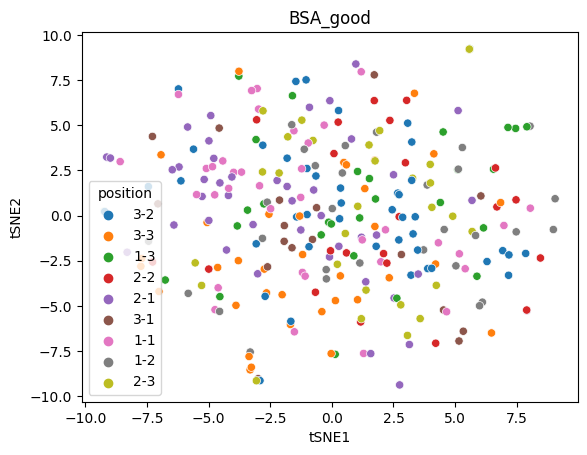

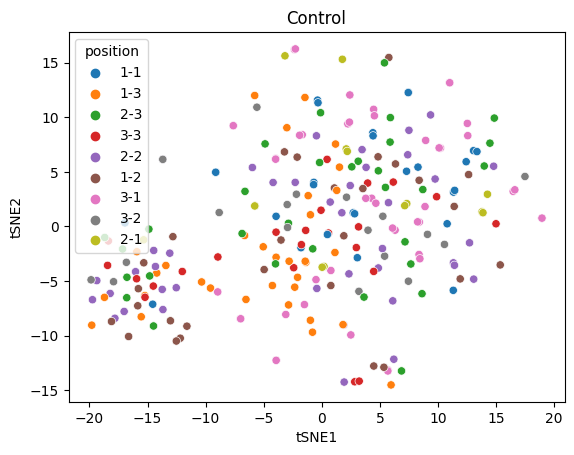

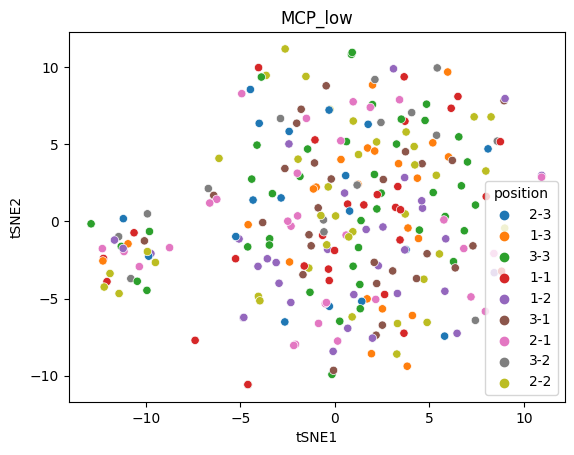

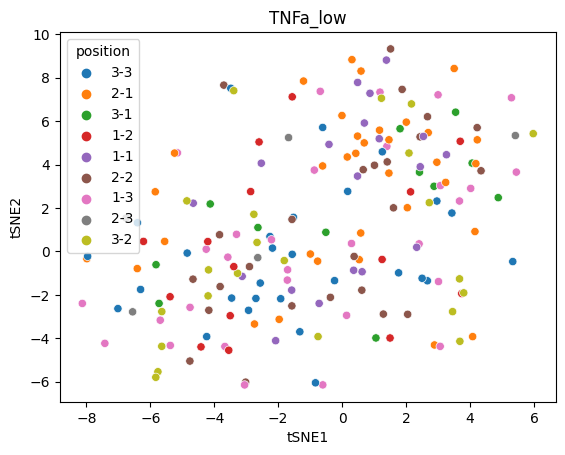

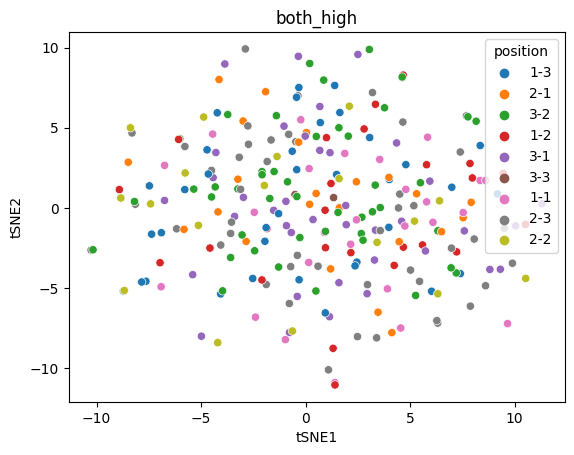

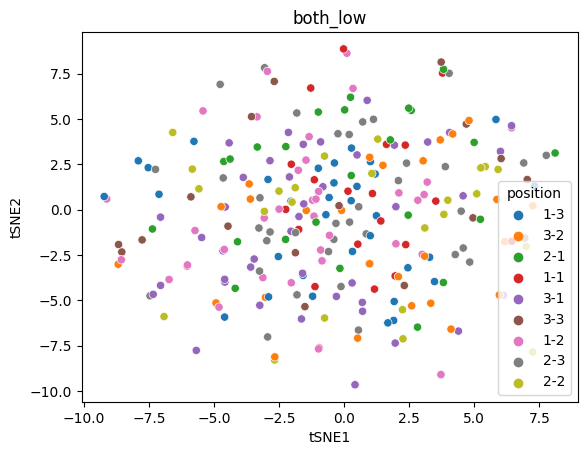

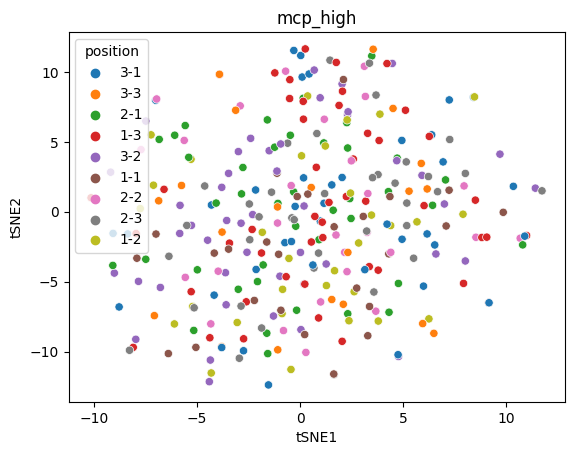

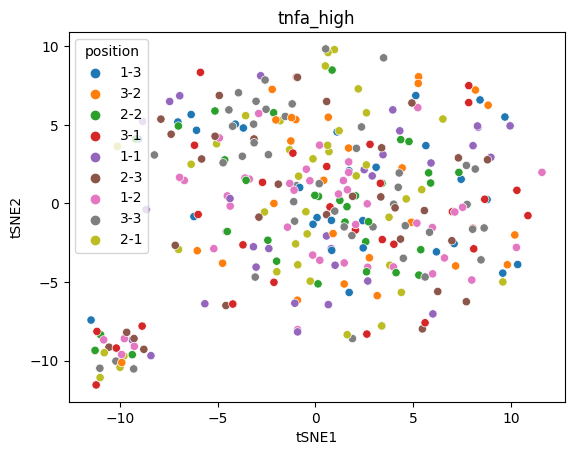

In [5]:
df = pd.read_pickle('dataframe_position.pkl')
dfs = plot_cluster_check_for_condition(df)

In [6]:
import pickle

with open('dfs_condition.pickle', 'wb') as handle:
    pickle.dump(dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)



<h5>PCA</h5>

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_normalized)
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_
transformed_data = pd.DataFrame(pca.transform(df_normalized))

In [31]:
transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), df['condition'].reset_index()], axis=1, ignore_index=False)
transformed_data_labeled

,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,169,170,index,condition
0,-0.438843,3.586767,-1.334873,-0.345362,-0.150372,0.208539,1.691259,1.035761,-0.714457,1.673304,...,1.187969e-16,1.671396e-16,-3.559118e-16,-1.953533e-18,5.682531e-16,-1.194166e-16,1.025185e-16,-7.912159e-17,0,BSA_good
1,-1.514191,2.872471,-4.751885,-1.077462,-0.357490,0.132812,0.012985,-0.117150,1.087174,0.448342,...,2.100660e-16,1.085329e-16,-2.715099e-16,-1.177717e-16,-1.209848e-16,-5.155976e-16,3.107565e-17,-1.671577e-16,1,BSA_good
2,0.008319,-0.451685,0.872594,-1.036483,-0.423046,0.669753,-1.314464,-1.851318,0.891954,1.979384,...,5.230727e-16,-1.704318e-16,9.966763e-17,9.324348e-17,-1.462713e-16,4.529276e-16,1.430808e-17,1.226366e-16,2,BSA_good
3,-0.574503,0.865781,-0.565794,0.428844,-0.929018,0.511846,0.544151,-0.283244,-1.421667,-0.351361,...,-5.556342e-16,1.982556e-16,-2.424757e-16,9.285513e-17,-3.018021e-17,4.731156e-16,-1.968667e-16,5.901396e-17,3,BSA_good
4,5.055686,-2.973449,1.001412,1.960156,-0.427457,-2.269353,4.328558,-3.978305,-1.616832,-2.501591,...,-8.234702e-16,4.173902e-16,6.147675e-16,2.586731e-16,-1.886884e-16,6.012611e-16,1.847404e-16,-1.218454e-15,4,BSA_good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,-1.941277,2.589836,-0.365436,-0.968871,-1.831950,-0.320885,0.383470,-0.223013,-0.391231,0.871059,...,-7.909549e-16,-1.294850e-16,3.890710e-16,-6.156194e-17,2.455340e-16,-4.378309e-17,-1.552720e-16,-2.909271e-16,2133,tnfa_high
2134,-0.482455,-6.022416,0.790266,2.036462,1.558702,-0.897480,2.155912,1.073076,1.754812,-1.693352,...,-2.238922e-16,3.885568e-16,2.591125e-16,1.952482e-17,2.070389e-18,3.973636e-16,7.802710e-17,-2.690911e-16,2134,tnfa_high
2135,-1.083354,-3.324327,5.071475,0.341436,0.626213,0.035540,1.620532,1.547617,1.659375,0.766118,...,3.294577e-16,-2.979189e-16,3.471322e-16,2.125255e-16,-4.656558e-17,8.976777e-16,1.104154e-16,-9.741733e-16,2135,tnfa_high
2136,-0.752885,-0.439569,1.261681,0.221068,-0.617611,-0.354692,0.545097,-0.300978,-0.173858,0.543136,...,4.092995e-16,-2.407326e-16,1.115341e-15,-1.259601e-16,4.676591e-17,7.506233e-17,4.645496e-17,3.780745e-16,2136,tnfa_high


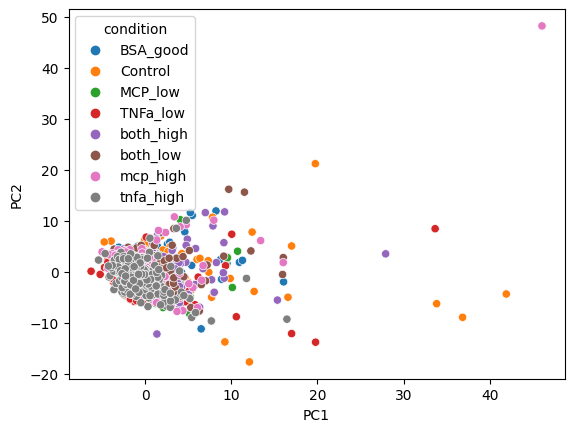

In [32]:
sns.scatterplot(data = transformed_data_labeled, x = 0, y = 1, hue='condition')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()